In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.signal as signal

from pathlib import Path
import glob
import shutil
import os
import pickle

import sys
sys.path.append('/storage3/eva/code/remapping/src')
import path_formatting as pf
import oe
import utils

In [2]:
date = "20250915"
animal = "eb03"

_, ks_path, _, res_path = utils.path_load(date, animal,p=True)

Ola! For folders inside of res_path: Path(res_path)/"folder_name"
To make new folder (if not exist): your_path.mkdir(parents=True, exist_ok=True)


In [3]:
spiketimesfile = ks_path+"/spike_times.npy"  
spiketimes = np.load(spiketimesfile)

clusterfile = ks_path+"/spike_clusters.npy"
spikeclusters = np.load(clusterfile)

Clusterinfofile = ks_path+"/cluster_info.tsv"
Clusterinfo = pd.read_csv(Clusterinfofile,sep='\t')

In [4]:
goodspiketimes = oe.ks_load(ks_path)
uoi = list(goodspiketimes.keys())
print(uoi)

Sup! U have...
51 phy-good clusters
[60, 89, 131, 190, 642, 647, 661, 663, 669, 673, 675, 677, 681, 683, 685, 687, 689, 699, 703, 711, 712, 716, 720, 722, 724, 734, 746, 750, 752, 754, 760, 762, 764, 770, 775, 777, 779, 781, 795, 805, 809, 811, 813, 815, 817, 819, 821, 823, 829, 834, 835]


In [5]:
Clusterinfo

,cluster_id,Amplitude,ContamPct,KSLabel,amp,ch,depth,fr,group,group_order,n_spikes,sh
0,0,15.5,3.1,good,1894.549805,94,2610.0,2.723289,noise,4,35527,0.0
1,1,10.8,59.6,mua,615.403992,94,2610.0,0.940775,noise,4,12273,0.0
2,2,9.5,77.0,mua,449.509186,95,2595.0,0.584564,noise,4,7626,0.0
3,3,9.3,80.5,mua,395.213196,190,2610.0,0.783711,noise,4,10224,1.0
4,4,8.8,1.5,good,703.163025,191,2595.0,0.157141,noise,4,2050,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
705,829,32.8,0.0,good,1842.029663,176,2820.0,0.067839,good,4,885,1.0
706,832,32.8,0.0,good,1842.029663,176,2820.0,0.006899,noise,4,90,1.0
707,833,32.8,0.0,good,1842.029663,176,2820.0,0.022000,noise,4,287,1.0
708,834,59.3,0.0,good,4249.116211,178,2790.0,0.054654,good,4,713,1.0


In [6]:
df_good_units = Clusterinfo[Clusterinfo['cluster_id'].isin(uoi)]

depth_sh_info = df_good_units[['cluster_id', 'depth', 'sh']].set_index('cluster_id').to_dict(orient='index')
print(depth_sh_info)

{60: {'depth': 2685.0, 'sh': 1.0}, 89: {'depth': 2745.0, 'sh': 1.0}, 131: {'depth': 2820.0, 'sh': 3.0}, 190: {'depth': 2970.0, 'sh': 1.0}, 642: {'depth': 2910.0, 'sh': 2.0}, 647: {'depth': 2895.0, 'sh': 1.0}, 661: {'depth': 2910.0, 'sh': 2.0}, 663: {'depth': 3045.0, 'sh': 1.0}, 669: {'depth': 2685.0, 'sh': 2.0}, 673: {'depth': 2895.0, 'sh': 2.0}, 675: {'depth': 3045.0, 'sh': 3.0}, 677: {'depth': 2625.0, 'sh': 0.0}, 681: {'depth': 3075.0, 'sh': 0.0}, 683: {'depth': 2940.0, 'sh': 1.0}, 685: {'depth': 2775.0, 'sh': 1.0}, 687: {'depth': 2700.0, 'sh': 2.0}, 689: {'depth': 3435.0, 'sh': 3.0}, 699: {'depth': 2790.0, 'sh': 0.0}, 703: {'depth': 2640.0, 'sh': 1.0}, 711: {'depth': 2640.0, 'sh': 1.0}, 712: {'depth': 2640.0, 'sh': 1.0}, 716: {'depth': 2640.0, 'sh': 1.0}, 720: {'depth': 2955.0, 'sh': 1.0}, 722: {'depth': 3495.0, 'sh': 3.0}, 724: {'depth': 3015.0, 'sh': 1.0}, 734: {'depth': 2595.0, 'sh': 3.0}, 746: {'depth': 2670.0, 'sh': 1.0}, 750: {'depth': 2655.0, 'sh': 1.0}, 752: {'depth': 3645.0

In [7]:
# Convert the dict to a list of [unit_id, depth, shank]
array_data = np.array([[unit_id, vals['depth'], vals['sh']] for unit_id, vals in depth_sh_info.items()])
array_data = array_data.astype(int)

print(array_data.shape)  # (n_units, 3)
print(array_data)

(51, 3)
[[  60 2685    1]
 [  89 2745    1]
 [ 131 2820    3]
 [ 190 2970    1]
 [ 642 2910    2]
 [ 647 2895    1]
 [ 661 2910    2]
 [ 663 3045    1]
 [ 669 2685    2]
 [ 673 2895    2]
 [ 675 3045    3]
 [ 677 2625    0]
 [ 681 3075    0]
 [ 683 2940    1]
 [ 685 2775    1]
 [ 687 2700    2]
 [ 689 3435    3]
 [ 699 2790    0]
 [ 703 2640    1]
 [ 711 2640    1]
 [ 712 2640    1]
 [ 716 2640    1]
 [ 720 2955    1]
 [ 722 3495    3]
 [ 724 3015    1]
 [ 734 2595    3]
 [ 746 2670    1]
 [ 750 2655    1]
 [ 752 3645    1]
 [ 754 2730    0]
 [ 760 2895    1]
 [ 762 2775    1]
 [ 764 2895    0]
 [ 770 2670    1]
 [ 775 2730    1]
 [ 777 2685    1]
 [ 779 2670    1]
 [ 781 2790    1]
 [ 795 2835    2]
 [ 805 3375    3]
 [ 809 2925    1]
 [ 811 3420    3]
 [ 813 2955    1]
 [ 815 3660    1]
 [ 817 3585    1]
 [ 819 3675    1]
 [ 821 3600    2]
 [ 823 3675    1]
 [ 829 2820    1]
 [ 834 2790    1]
 [ 835 2850    2]]


In [8]:
with open(Path(res_path) / f"shanks_loc_{animal}_{date}.pkl", "wb") as f:
    pickle.dump(array_data, f)

# with open(res_path_path/"smooth_pitch_dict.pkl", "rb") as f:
#     shanks_loc = pickle.load(f)

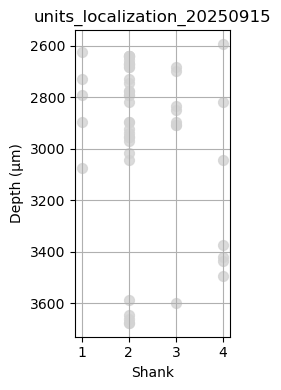

In [9]:
# Remap shank numbers: 0 → 0.5, 1 → 1.0, 2 → 1.5, 3 → 2.0
roi = []
shank_map = {0: 0.5, 1: 1.0, 2: 1.5, 3: 2.0}

unit_ids = array_data[:, 0].astype(int)
depths = array_data[:, 1]
shanks_raw = array_data[:, 2].astype(int)
shanks = np.array([shank_map[s] for s in shanks_raw])

plt.figure(figsize=(2.5, 4))

# 1. Plot all non-ROI units (dimmed and smaller)
for unit_id, depth, shank in zip(unit_ids, depths, shanks):
    if unit_id not in roi:
        plt.scatter(shank, depth, color='lightgray', s=50, alpha=0.8)

# 2. Plot ROI units (bright and larger, on top)
for unit_id, depth, shank in zip(unit_ids, depths, shanks):
    if unit_id in roi:
        color = 'red'  # Or any bright color you like
        plt.scatter(shank, depth, color=color, s=80, alpha=1.0, edgecolors='black', linewidths=0.5)

# Shank ticks and labels
plt.xticks([0.5, 1.0, 1.5, 2.0], ['1', '2', '3', '4'])
plt.gca().invert_yaxis()  # Depth increases downward
plt.xlabel('Shank')
plt.ylabel('Depth (µm)')

filename = f"units_localization_{date}"
plt.title(filename)

plt.grid(True)
plt.tight_layout()

plt.savefig(os.path.join(res_path, filename), dpi=300, bbox_inches='tight')
plt.show()